<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,22.229492,44.593729,42.624580,85.215388,-1264.883068,-1060.219878,280.505179,-1340.725057
1,0.0,1.0,33.556186,82.284330,67.372467,28.722930,-1212.570800,-990.634888,-58.140427,-932.494461
2,0.0,2.0,34.723805,28.797634,94.833536,89.595819,455.020917,712.971711,161.422840,551.548872
3,0.0,3.0,75.401143,43.114740,87.695613,36.766464,-495.258746,-242.280787,143.187046,-385.467832
4,0.0,4.0,47.559858,76.377106,65.192910,68.273140,6.828842,274.231856,134.351179,139.880677
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.609610,85.600135,64.393174,88.514059,1024.450615,1348.567593,389.540891,959.026702
119996,999.0,116.0,73.892586,74.846135,54.515313,40.160541,-778.152972,-524.738397,282.735061,-807.473458
119997,999.0,117.0,73.445563,61.045068,59.825720,77.743032,19.168219,301.227602,331.306961,-30.079359
119998,999.0,118.0,24.073359,90.517666,42.004422,27.340799,-438.817583,-244.881336,172.314902,-417.196238


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    22.229492  44.593729  42.624580  85.215388 -1264.883068   
      1.0    33.556186  82.284330  67.372467  28.722930 -1212.570800   
      2.0    34.723805  28.797634  94.833536  89.595819   455.020917   
      3.0    75.401143  43.114740  87.695613  36.766464  -495.258746   
      4.0    47.559858  76.377106  65.192910  68.273140     6.828842   
...                ...        ...        ...        ...          ...   
999.0 115.0  75.609610  85.600135  64.393174  88.514059  1024.450615   
      116.0  73.892586  74.846135  54.515313  40.160541  -778.152972   
      117.0  73.445563  61.045068  59.825720  77.743032    19.168219   
      118.0  24.073359  90.517666  42.004422  27.340799  -438.817583   
      119.0  72.674887  91.280381  36.862430  32.087492  1803.899305   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0   -1060.219878  280.505179 -1340.725057  
      1.0    -990.634888  -58.140427  -932.494461  
      2.0     712.971711  161.422840   551.548872  
      3.0    -242.280787  143.187046  -385.467832  
      4.0     274.231856  134.351179   139.880677  
...                  ...         ...          ...  
999.0 115.0  1348.567593  389.540891   959.026702  
      116.0  -524.738397  282.735061  -807.473458  
      117.0   301.227602  331.306961   -30.079359  
      118.0  -244.881336  172.314902  -417.196238  
      119.0  2046.804495  320.908877  1725.895617  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    22.229492  44.593729  42.624580  85.215388 -1264.883068   
      1.0    33.556186  82.284330  67.372467  28.722930 -1212.570800   
      2.0    34.723805  28.797634  94.833536  89.595819   455.020917   
      3.0    75.401143  43.114740  87.695613  36.766464  -495.258746   
      4.0    47.559858  76.377106  65.192910  68.273140     6.828842   
...                ...        ...        ...        ...          ...   
999.0 115.0  75.609610  85.600135  64.393174  88.514059  1024.450615   
      116.0  73.892586  74.846135  54.515313  40.160541  -778.152972   
      117.0  73.445563  61.045068  59.825720  77.743032    19.168219   
      118.0  24.073359  90.517666  42.004422  27.340799  -438.817583   
      119.0  72.674887  91.280381  36.862430  32.087492  1803.899305   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0   -1060.219878  280.505179 -1340.725057  
      1.0    -990.634888  -58.140427  -932.494461  
      2.0     712.971711  161.422840   551.548872  
      3.0    -242.280787  143.187046  -385.467832  
      4.0     274.231856  134.351179   139.880677  
...                  ...         ...          ...  
999.0 115.0  1348.567593  389.540891   959.026702  
      116.0  -524.738397  282.735061  -807.473458  
      117.0   301.227602  331.306961   -30.079359  
      118.0  -244.881336  172.314902  -417.196238  
      119.0  2046.804495  320.908877  1725.895617  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,22.229492,44.593729,42.624580,85.215388,-1264.883068,-1060.219878,280.505179,-1340.725057
1,0.0,1.0,33.556186,82.284330,67.372467,28.722930,-1212.570800,-990.634888,-58.140427,-932.494461
2,0.0,2.0,34.723805,28.797634,94.833536,89.595819,455.020917,712.971711,161.422840,551.548872
3,0.0,3.0,75.401143,43.114740,87.695613,36.766464,-495.258746,-242.280787,143.187046,-385.467832
4,0.0,4.0,47.559858,76.377106,65.192910,68.273140,6.828842,274.231856,134.351179,139.880677
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.609610,85.600135,64.393174,88.514059,1024.450615,1348.567593,389.540891,959.026702
119996,999.0,116.0,73.892586,74.846135,54.515313,40.160541,-778.152972,-524.738397,282.735061,-807.473458
119997,999.0,117.0,73.445563,61.045068,59.825720,77.743032,19.168219,301.227602,331.306961,-30.079359
119998,999.0,118.0,24.073359,90.517666,42.004422,27.340799,-438.817583,-244.881336,172.314902,-417.196238


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    22.229492  44.593729  42.624580  85.215388 -1264.883068   
      1.0    33.556186  82.284330  67.372467  28.722930 -1212.570800   
      2.0    34.723805  28.797634  94.833536  89.595819   455.020917   
      3.0    75.401143  43.114740  87.695613  36.766464  -495.258746   
      4.0    47.559858  76.377106  65.192910  68.273140     6.828842   
...                ...        ...        ...        ...          ...   
999.0 115.0  75.609610  85.600135  64.393174  88.514059  1024.450615   
      116.0  73.892586  74.846135  54.515313  40.160541  -778.152972   
      117.0  73.445563  61.045068  59.825720  77.743032    19.168219   
      118.0  24.073359  90.517666  42.004422  27.340799  -438.817583   
      119.0  72.674887  91.280381  36.862430  32.087492  1803.899305   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0   -1060.219878  280.505179 -1340.725057  
      1.0    -990.634888  -58.140427  -932.494461  
      2.0     712.971711  161.422840   551.548872  
      3.0    -242.280787  143.187046  -385.467832  
      4.0     274.231856  134.351179   139.880677  
...                  ...         ...          ...  
999.0 115.0  1348.567593  389.540891   959.026702  
      116.0  -524.738397  282.735061  -807.473458  
      117.0   301.227602  331.306961   -30.079359  
      118.0  -244.881336  172.314902  -417.196238  
      119.0  2046.804495  320.908877  1725.895617  

[120000 rows x 8 columns]

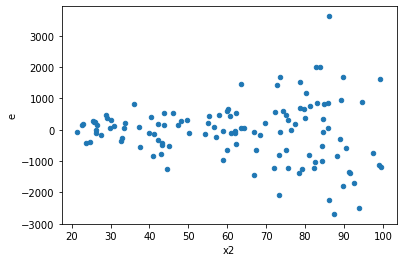

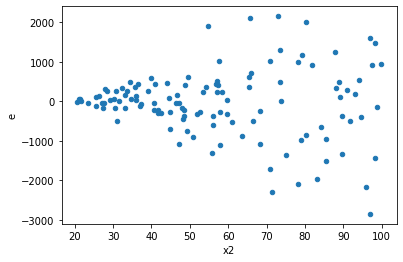

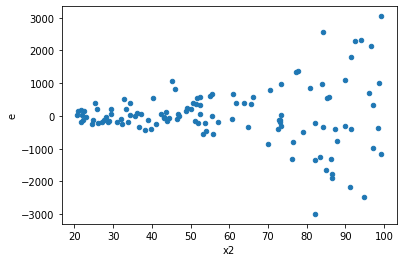

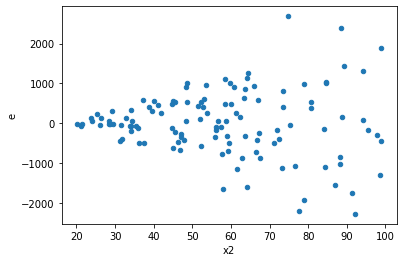

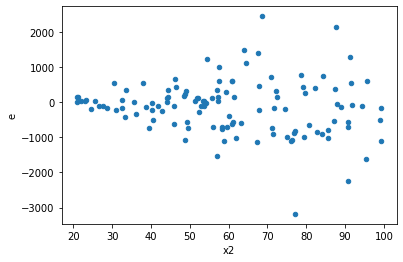

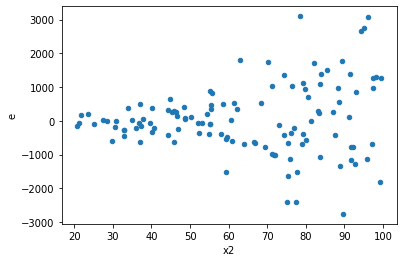

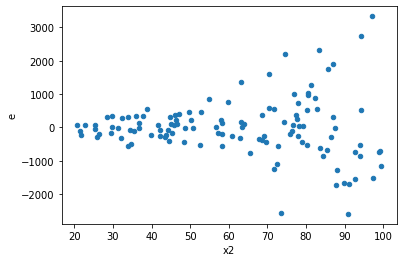

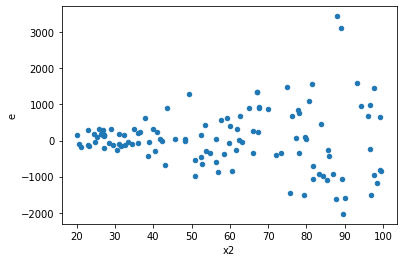

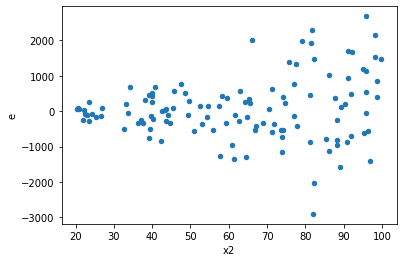

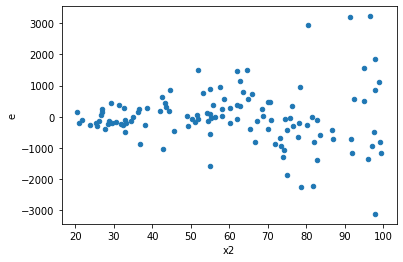

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,67.0,26907479.372657847,71429170.37602144,597943.9860590632,1066107.0205376334,1.7829546669816767,0.03111183796759298,0.9844440810162035,0.01555591898379649,Reject005=0 : Heteroscedasticity
2.0,70.0,42.0,49592354.12577861,40603718.747228324,708462.2017968373,966755.208267341,1.364582621084665,0.27941795226910404,0.860291023865448,0.13970897613455202,Reject005=1 : Homoscedasticity
3.0,42.0,70.0,21117763.238250334,51142939.99485278,502803.88662500796,730613.4284978969,1.453078323244525,0.1651128830820403,0.9174435584589798,0.08255644154102015,Reject005=1 : Homoscedasticity
6.0,59.0,53.0,28186677.424023982,45975324.625063375,477740.2953224404,867458.955189875,1.8157542155919724,0.02877597106106844,0.9856120144694658,0.01438798553053422,Reject005=0 : Heteroscedasticity
7.0,61.0,51.0,37972934.87718863,38925134.0967696,622507.1291342399,763237.9234660706,1.2260709761309143,0.45612829086840634,0.7719358545657968,0.22806414543420317,Reject005=1 : Homoscedasticity
13.0,47.0,65.0,12150025.773636911,54919292.05386621,258511.18667312578,844912.1854440955,3.26837765250153,1.176172291317279e-05,0.9999941191385434,5.880861456586395e-06,Reject005=0 : Heteroscedasticity
19.0,65.0,47.0,16930536.741845418,49786519.57313208,260469.79602839105,1059287.650492172,4.066834875459842,1.6334940535767117e-06,0.9999991832529732,8.167470267883559e-07,Reject005=0 : Heteroscedasticity
20.0,63.0,49.0,13374384.444318112,49026888.90140114,212291.81657647796,1000548.7530898192,4.713082064231959,1.0542231976273797e-07,0.9999999472888401,5.2711159881368985e-08,Reject005=0 : Heteroscedasticity
21.0,46.0,66.0,26383063.869262606,87447270.80346835,573544.8667231001,1324958.6485373992,2.310122059164156,0.0018245120088573596,0.9990877439955713,0.0009122560044286798,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,67.0,26907479.372657847,71429170.37602144,597943.9860590632,1066107.0205376334,1.7829546669816767,0.03111183796759298,Reject005=0 : Heteroscedasticity
1.0,56.0,56.0,40822240.09086735,37675099.31091085,728968.5730512027,672769.6305519795,0.9229062204094829,0.7650869589179133,Reject005=1 : Homoscedasticity
2.0,70.0,42.0,49592354.12577861,40603718.747228324,708462.2017968373,966755.208267341,1.364582621084665,0.27941795226910404,Reject005=1 : Homoscedasticity
3.0,42.0,70.0,21117763.238250334,51142939.99485278,502803.88662500796,730613.4284978969,1.453078323244525,0.1651128830820403,Reject005=1 : Homoscedasticity
4.0,60.0,52.0,53172690.18774927,13442077.506555328,886211.5031291544,258501.49051067937,0.29169277265971794,6.408460850365379e-06,Reject005=0 : Heteroscedasticity
5.0,64.0,48.0,91128087.39440855,22808855.53135736,1423876.3655376337,475184.49023661163,0.3337259482196611,4.807910558618728e-05,Reject005=0 : Heteroscedasticity
6.0,59.0,53.0,28186677.424023982,45975324.625063375,477740.2953224404,867458.955189875,1.8157542155919724,0.02877597106106844,Reject005=0 : Heteroscedasticity
7.0,61.0,51.0,37972934.87718863,38925134.0967696,622507.1291342399,763237.9234660706,1.2260709761309143,0.45612829086840634,Reject005=1 : Homoscedasticity
8.0,43.0,69.0,52101088.312924445,26691622.191698022,1211653.2165796382,386835.10422750755,0.31926222695921186,0.00011525753173271939,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    636
Reject005=1 : Homoscedasticity      364
Name: Result_test, dtype: int64